In [3]:
import rasterio

# File path
file_path = "Annual_NLCD_LndCov_1985.tiff"

# Open the GeoTIFF file
with rasterio.open(file_path) as src:
    # Print metadata
    print("Metadata:")
    print(src.meta)

    # Get dimensions
    print("\nDimensions (width x height):")
    print(src.width, "x", src.height)

    # Get number of bands
    print("\nNumber of Bands:")
    print(src.count)

    # Print CRS (coordinate reference system)
    print("\nCRS:")
    print(src.crs)

    # Print bounding box
    print("\nBounding Box:")
    print(src.bounds)



Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 250.0, 'width': 31842, 'height': 19683, 'count': 1, 'crs': CRS.from_wkt('PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'), 'transform': Affine(30.0, 0.0, 954675.0,
       0.0, -30.0, 1863795.0)}

Dimensions (width x height):
31842 x 19683

Number of Bands:
1

CRS:
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.017453292519943

Clip File

In [5]:
from osgeo import gdal

# Input and output file paths
input_file = "Annual_NLCD_LndCov_1985.tiff"
output_file = "clipped_output_2.tif"

# Bounding box coordinates (min longitude, min latitude, max longitude, max latitude)
bbox_latlon = (-85.40310668945312, 31.886478424072266, -73.95083618164062, 38.3839111328125)

# Warp options for clipping
warp_options = gdal.WarpOptions(
    outputBounds=bbox_latlon,
    dstSRS='EPSG:5070'  # Ensure the output is in the correct spatial reference system
)

# Perform the clipping
gdal.Warp(output_file, input_file, options=warp_options)

print(f"Clipping completed. Output saved to {output_file}")


Clipping completed. Output saved to clipped_output_2.tif


In [ ]:
#Question File to Big for Mapping I guess. GDAL Not working to clip
# can I possibily clip to a county shapefile 

import geopandas as gpd

# Load the shapefile
shapefile_path = "/data/HW/HW2/NCDOT_County_Boundaries.shp"
counties = gpd.read_file(shapefile_path)
counties = counties.to_crs(epsg=4326)
# View the column names
print(counties.columns)

# View the first few rows of the data to inspect the content
print(counties.head())

In [1]:
from osgeo import gdal

# Input and output file paths
input_file = "Annual_NLCD_LndCov_1985.tiff"
output_file = "clipped_output_small_2.tif"

# Bounding box coordinates (min longitude, min latitude, max longitude, max latitude)
bbox_latlon = (-85, 31, -84, 32)

# Warp options for clipping
warp_options = gdal.WarpOptions(
    outputBounds=bbox_latlon,
    dstSRS='EPSG:5070'  # Ensure the output is in the correct spatial reference system
)

# Perform the clipping
gdal.Warp(output_file, input_file, options=warp_options)

print(f"Clipping completed. Output saved to {output_file}")

Clipping completed. Output saved to clipped_output_small_2.tif


### Start here: Map the Land Cover Data

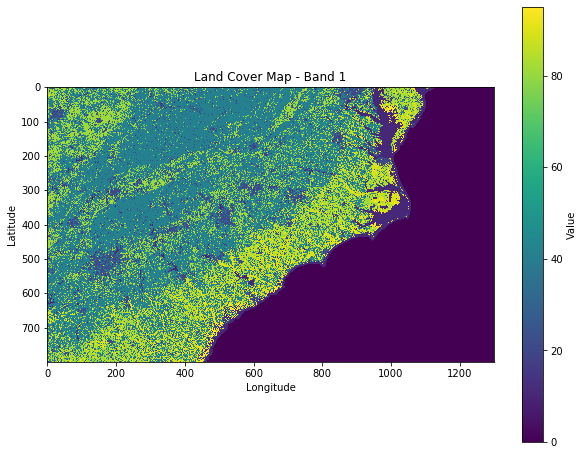

In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
%matplotlib inline
# File path to the .tif file
#why does 0.001 not work?
file_path = "/shared_space/ACV/nlcd_nc0.1.tif"

# Open the .tif file
with rasterio.open(file_path) as src:
    # Read a specific band (e.g., the first band)
    band1 = src.read(1)

    # Plot the band
    plt.figure(figsize=(10, 8))
    plt.imshow(band1, cmap="viridis")
    plt.colorbar(label="Value")
    plt.title("Land Cover Map - Band 1")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

In [1]:
%%bash
ls /shared_space/ACV/


county_shp
extracted_raw
inter_files
ncar_extracted
nlcd_nc0.001.tif
nlcd_nc0.1.tif
nlcd_nc.tif
raw_data
tif_files
